# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

(You need to write your answer in this markdown cell)

There are 45053 unique listings and 26286 unique hosts in the LA dataset


In [1]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)
import pandas as pd
#put data into df
df=pd.read_csv("listings.csv")

unique_listings=df["id"].unique()
unique_hosts=df["host_id"].unique()
len(unique_listings),len(unique_hosts)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45053, 26286)

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

The mean, median, standard deviation, minimum and maximum of the number of listings per host in LA are 1.713954, 1.000000, 2.999126, 1.000000, 172.000000.

In [2]:
# You need to provide the code to answer the previous quesiton
import numpy as np

#unique_host dataframe
unique_host=df.drop_duplicates(keep="first",subset=["host_id"])

num_listings_per_host=list(unique_host["calculated_host_listings_count"])
print("mean = %f" %(np.mean(num_listings_per_host)))
print("median = %f" %(np.median(num_listings_per_host)))
print("std = %f" %(np.std(num_listings_per_host)))
print("minimum = %f" %(np.min(num_listings_per_host)))
print("maximum = %f" %(np.max(num_listings_per_host)))

mean = 1.713954
median = 1.000000
std = 2.999126
minimum = 1.000000
maximum = 172.000000


### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

For non-super hosts, the average number of listings is 1.671021. The standard deviation number of listings is 2.926276.

For super hosts, the average number of listings is 1.824264. The standard deviation number of listings is 3.177892.

Super hosts have more listings on average.

In [3]:
# You need to provide the code to answer the previous quesiton
unique_host.groupby(by="host_is_superhost").calculated_host_listings_count.agg([np.mean,np.std])

,mean,std
host_is_superhost,,
f,1.671021,2.926276
t,1.824264,3.177892


### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**


The unique types of host verifications are 'email', 'facebook', 'google', 'government_id', 'identity_manual', 'jumio', 'kba', 'manual_offline', 'manual_online', 'offline_government_id', 'phone', 'photographer', 'reviews', 'selfie', 'sent_id', 'sesame', 'sesame_offline', 'weibo', 'work_email', and 'zhima_selfie'.

In [4]:
# You need to provide the code to answer the previous quesiton
methods=[]
for info in df.host_verifications:
    trans_info=info.strip('[').strip(']').replace('\'','').replace(' ','').split(',')
    for method in trans_info:
        methods.append(method)

list(np.unique(methods))
#Here are the unique types of host verifications.

['',
 'None',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'photographer',
 'reviews',
 'selfie',
 'sent_id',
 'sesame',
 'sesame_offline',
 'weibo',
 'work_email',
 'zhima_selfie']

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

**five most popular varification type:**

phone, email, reviews, government_id, and jumio

**percent of verified hosts**

phone:0.9967663394963098

email:0.9383702351061401

reviews:0.688541428897512

government_id:0.5876892642471278

jumio:0.43338659362398235

In [5]:
# You need to provide the code to answer the previous quesiton
df_unique_hosts=df.drop_duplicates(keep='first',subset=["host_id"])
verifications=[]
for info in df_unique_hosts.host_verifications:
    trans_info=info.strip('[').strip(']').replace('\'','').replace(' ','').split(',')
    for verification in trans_info:
        verifications.append(verification)

import collections
#a dictionary contains top 5 verifications and the number of hosts using each verificaion
top_5_verifications=dict(collections.Counter(verifications).most_common(5))

for v in top_5_verifications.keys():
    print(v,top_5_verifications[v]/len(unique_hosts))

#The five most popualar verification types of hosts and the percentage of hosts verify that
#type are as follows.(printed results)

phone 0.9967663394963098
email 0.9383702351061401
reviews 0.688541428897512
government_id 0.5876892642471278
jumio 0.43338659362398235


### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

**mean:** 254.778227

**standard deviation:** 684.755050

In [6]:
# You need to provide the code to answer the previous quesiton
calendar=pd.read_csv("calendar.csv")

In [7]:
# In question 2, we keep all LA hosts and their listings data in df_la
pd.options.mode.chained_assignment = None  # default='warn'
la_listings=list(df.id)
calendar_q6=calendar.loc[(calendar["listing_id"].isin(la_listings))\
                         &(calendar["date"]>='2020-01-01')\
                         &(calendar["date"]<='2020-03-01')&(calendar["available"]=='t'),:]
calendar_q6.loc[:,"price"]=\
           calendar_q6.loc[:,"price"].str.replace(",","").str.strip('$').astype('float64')
avg_listing_price=calendar_q6.groupby(by='listing_id').price.mean()
avg_listing_price.agg([np.mean,np.std])

mean    254.778227
std     684.755050
Name: price, dtype: float64

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

**Jan 2016 Top 10 words:**

great, stay, place, clean, location, house, us, nice, would,host

**Mar 2017 Top 10 words:**

great, place, stay, location, clean, would, nice, host, house,comfortable

**Apr 2018 Top 10 words:**

great,place, stay, location,clean, would, host, nice, house, everything

In [8]:
# You need to provide the code to answer the previous quesiton
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords 
import nltk
stop_words = set(stopwords.words('english'))
reviews=pd.read_csv("reviews.csv")
reviews_2016_Jan=reviews.loc[(reviews.date.str.split('-').apply(lambda x: x[0])=='2016')\
                            &(reviews.date.str.split('-').apply(lambda x: x[1])=='01'),:]
words=[]
for review in reviews_2016_Jan["comments"]:
    word_tokens = wordpunct_tokenize(str(review))
    #"if not w.lower() in stop_words" to remove stopwords
    #"if w.lower().isalpha()" to remove punctuation and numbers 
    word_tokens = [w.lower() for w in word_tokens if not w.lower() in stop_words if w.lower().isalpha()]
    for word in word_tokens:
        words.append(word)

In [9]:
collections.Counter(words).most_common(10)

[('great', 5441),
 ('stay', 4713),
 ('place', 4339),
 ('clean', 2773),
 ('location', 2763),
 ('house', 2699),
 ('us', 2649),
 ('nice', 2441),
 ('would', 2433),
 ('host', 2392)]

In [10]:
reviews_2017_Mar=reviews.loc[(reviews.date.str.split('-').apply(lambda x: x[0])=='2017')\
                            &(reviews.date.str.split('-').apply(lambda x: x[1])=='03'),:]
words=[]
for review in reviews_2017_Mar["comments"]:
    word_tokens = wordpunct_tokenize(str(review))
    word_tokens = [w.lower() for w in word_tokens if not w.lower() in stop_words if w.lower().isalpha()]
    for word in word_tokens:
        words.append(word)
collections.Counter(words).most_common(10)

[('great', 12305),
 ('place', 11596),
 ('stay', 9541),
 ('location', 5975),
 ('clean', 5521),
 ('would', 4597),
 ('nice', 4589),
 ('host', 4527),
 ('house', 3839),
 ('comfortable', 3825)]

In [11]:
reviews_2018_April=reviews.loc[(reviews.date.str.split('-').apply(lambda x: x[0])=='2018')\
                            &(reviews.date.str.split('-').apply(lambda x: x[1])=='04'),:]
words=[]
for review in reviews_2018_April["comments"]:
    word_tokens = wordpunct_tokenize(str(review))
    word_tokens = [w.lower() for w in word_tokens if not w.lower() in stop_words if w.lower().isalpha()]
    for word in word_tokens:
        words.append(word)
collections.Counter(words).most_common(10)

[('great', 18992),
 ('place', 18776),
 ('stay', 14854),
 ('location', 10154),
 ('clean', 9165),
 ('would', 7444),
 ('host', 6962),
 ('nice', 6863),
 ('house', 5619),
 ('everything', 5403)]

### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

**zipcode   price**

90210    1963.557367

90077    1909.066130

90265    1559.605010

90069     991.562953

91436     742.660019

**zipcode num_listing**

90069:          426

90077:           74

90210:          278

90265:          329

91436:           40

**zipcode  num_active_host**

90069:287

90077:39

90210: 157

90265: 212

91436: 32

In [12]:
# You need to provide the code to answer the previous quesiton
df_zp_id=df.merge(calendar,how="inner",left_on="id",right_on="listing_id")

In [14]:
df8_date=df_zp_id.loc[(df_zp_id["date"]>='2020-01-01')&\
                      (df_zp_id["date"]<='2020-02-01'),:].reset_index(drop=True)

In [15]:
#clear zipcode
#remove space
df8_date.loc[:,"zipcode"]=df8_date.loc[:,"zipcode"].str.replace(" ","")
#remove "CA"
df8_date.loc[:,"zipcode"]=df8_date.loc[:,"zipcode"].str.replace("CA","")
#remove "near"
df8_date.loc[:,"zipcode"]=df8_date.loc[:,"zipcode"].str.replace("Near","")
for i in range(len(df8_date["zipcode"])):
    if '-' in str(df8_date.loc[i,"zipcode"]):
        df8_date.loc[i,"zipcode"]=df8_date.loc[i,"zipcode"].split("-")[0]
    if '.' in str(df8_date.loc[i,"zipcode"]):
        df8_date.loc[i,"zipcode"]=df8_date.loc[i,"zipcode"].split(".")[1]

In [16]:
df8_date=df8_date.loc[df8_date["available"]=='t',:]

In [17]:
#filtered rows(has at least 30 listings between 2020-01-01 to 2020-02-01 (inclusive))
#calculate unique listings
df8_date_over30=df8_date.groupby(by="zipcode").filter\
                                              (lambda x: len(x["listing_id"].unique())>=30)

In [18]:
#transform price's type to float
#after merging, the name of "price" in calender changed to "price_y"
df8_date_over30["price_y"]=\
df8_date_over30.price_y.str.replace(",","").str.strip('$').astype('float64')

**top 5 zipcodes and their average listing prices**

In [19]:
df8_date_over30.groupby("zipcode").price_y.mean().sort_values(ascending=False).head(5)
#Here are the top 5 zipcodes and the average listing price for each zipcode

zipcode
90210    1963.557367
90077    1909.066130
90265    1559.605010
90069     991.562953
91436     742.660019
Name: price_y, dtype: float64

In [20]:
top5_zipcode=['90210','90077','90265','90069','91436']
df8_date_top5=df8_date.loc[df8_date["zipcode"].isin(top5_zipcode),:]

In [21]:
df8_date_top5_active=df8_date_top5.loc[df8_date_top5["available"]=='t',:]

**number of active listings in these top five zipcodes**

In [22]:
df8_unique_listing=df8_date_top5_active.drop_duplicates(keep='first',subset=["listing_id"])
df8_unique_listing.groupby(by="zipcode").listing_id.count()

zipcode
90069    426
90077     74
90210    278
90265    329
91436     40
Name: listing_id, dtype: int64

**number of active hosts in these top five zipcodes**

In [23]:
df8_unique_host=df8_date_top5_active.drop_duplicates(keep='first',subset=["host_id"])
df8_unique_host.groupby(by="zipcode").host_id.count()

zipcode
90069    287
90077     39
90210    157
90265    212
91436     32
Name: host_id, dtype: int64

### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

**zipcode--listing price difference--weekday price--weekend price**

90265  --  18.070291  -- 1569.434866 -- 1551.364575	

90210 --   12.793700  -- 1982.372632 -- 1969.578932

90077  --  12.015421  -- 1956.961296 -- 1968.976717

90211  --  10.796548  -- 256.875348  --  246.078799

91401  --   9.743088  -- 184.09173   --  174.348643

In [24]:
# You need to provide the code to answer the previous quesiton
df9_date=df_zp_id.loc[(df_zp_id["date"]>='2020-01-01')&\
                      (df_zp_id["date"]<='2020-04-01'),:].reset_index(drop=True)

In [25]:
#clear zipcode
#remove space
df9_date.loc[:,"zipcode"]=df9_date.loc[:,"zipcode"].str.replace(" ","")
#remove "CA"
df9_date.loc[:,"zipcode"]=df9_date.loc[:,"zipcode"].str.replace("CA","")
#remove "near"
df9_date.loc[:,"zipcode"]=df9_date.loc[:,"zipcode"].str.replace("Near","")
for i in range(len(df9_date["zipcode"])):
    if '-' in str(df9_date.loc[i,"zipcode"]):
        df9_date.loc[i,"zipcode"]=df9_date.loc[i,"zipcode"].split("-")[0]
    if '.' in str(df9_date.loc[i,"zipcode"]):
        df9_date.loc[i,"zipcode"]=df9_date.loc[i,"zipcode"].split(".")[1]

In [26]:
df9_date=df9_date.loc[df9_date["available"]=='t',:]

In [27]:
#filtered rows(has at least 30 listings between 2020-01-01 to 2020-04-01 (inclusive))
#calculate unique listings
df9_date_over30=df9_date.groupby(by="zipcode").filter\
                                              (lambda x: len(x["listing_id"].unique())>=30)

In [28]:
df9_date_over30=df9_date_over30.loc[:,["zipcode","host_id","listing_id","date","price_y"]]


In [29]:
#tranfore data to weekname
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
weekends=["Satuaday","Sunday"]
df9_date_over30["date"]=df9_date_over30.date.apply\
        (lambda x: "Weekends" if pd.to_datetime(x).weekday_name in weekends else "Weekdays")
df9_date_over30.head(10)

,zipcode,host_id,listing_id,date,price_y
91,90230,521,109,Weekdays,$122.00
183,91505,767,344,Weekdays,$150.00
184,90046,3008,2708,Weekdays,$65.00
185,90046,3008,2708,Weekdays,$65.00
186,90046,3008,2708,Weekdays,$63.00
187,90046,3008,2708,Weekdays,$62.00
188,90046,3008,2708,Weekends,$60.00
189,90046,3008,2708,Weekdays,$58.00
190,90046,3008,2708,Weekdays,$57.00
191,90046,3008,2708,Weekdays,$55.00


In [30]:
df9_date_over30["price_y"]=\
        df9_date_over30.price_y.str.replace(",","").str.strip('$').astype('float64')

In [31]:
#calculate the avg weekdays price and avg weekends price for each zipcpde
df9_date_over30_vsprice=\
        df9_date_over30.groupby(by=["zipcode","date"])["price_y"].mean().unstack(level=1)
df9_date_over30_vsprice.head(3)

date,Weekdays,Weekends
zipcode,,
90003,47.834342,47.408882
90004,179.980619,176.347076
90005,117.591631,115.575885


In [32]:
abs(df9_date_over30_vsprice["Weekdays"]-df9_date_over30_vsprice["Weekends"])\
    .sort_values(ascending=False).head(5)

zipcode
90265    18.070291
90210    12.793700
90077    12.015421
90211    10.796548
91401     9.743088
dtype: float64

In [65]:
zipcodes=list(abs(df9_date_over30_vsprice["Weekdays"]-df9_date_over30_vsprice["Weekends"])\
    .sort_values(ascending=False).head(5).index)
df9_date_over30_vsprice.loc[zipcodes,:]

date,Weekdays,Weekends
zipcode,,
90265,1569.434866,1551.364575
90210,1982.372632,1969.578932
90077,1956.961296,1968.976717
90211,256.875348,246.078799
91401,184.091731,174.348643


### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

**Daily capacity:**

**mean:** 46995.228261

**std:** 4980.641316

**Daily price per bed:**

**mean:** 124.113884

**std:** 5.626011

In [33]:
# You need to provide the code to answer the previous quesiton
df10_date=df_zp_id.loc[(df_zp_id["date"]>='2020-01-01')&\
                      (df_zp_id["date"]<='2020-04-01'),:].reset_index(drop=True)

In [34]:
df10_simple=df10_date.loc[:,["listing_id","host_id","price_y","date","beds","available"]]
df10_simple=df10_simple.loc[df10_simple["available"]=='t',:]

In [35]:
#the average and standard deviation of the daily total capacity
daily_capacity=df10_simple.groupby(by="date").beds.sum()
daily_capacity.agg([np.mean,np.std])

mean    46995.228261
std      4980.641316
Name: beds, dtype: float64

In [36]:
#the average and standard deviation of the daily price per bed 
df10_simple["price_y"]=\
        df10_simple.price_y.str.replace(",","").str.strip('$').astype('float64')

In [37]:
temp=df10_simple.groupby(by='date')["price_y","beds"].sum()
daily_price=temp["price_y"]/temp["beds"]
daily_price.agg([np.mean,np.std])

mean    124.113884
std       5.626011
dtype: float64

## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**(You need to use this cell to write your 5 questions)**

**Question 1:How does the average daily listing price change with the date from 2019-09-14?**

**Question 2:what are the 10 most flourishing neightborhood? Any ideas why?**

**Question 3:Which neighbourhoods are becoming more popular in recent years?**

**Question 4:Is there any difference in review top words above or below the average review rating?**

**Question 5:How is the average review scores difference between different property and room types?**


**question 1**

**Answer:**

overall there is a fluctuation in the average daily listings price, and the price is increasing moderately.

As we can see, dates around Christmas have significantly high average prices, which is quite reasonable. There is also a predicted high price on April 28th, 2020. Hosts may get more revenue on specific holidays.

In [38]:
#### Your code to answer Question 
import datetime
import time
calendar_price=calendar.loc[:,["price","date"]]
calendar_price["price"]=calendar_price["price"].str.replace(",","").str.strip('$').astype('float64')
def func1(d):
    detester1 = '2019-09-14' 
    detester2 = d
    d1 = time.strptime(detester1,'%Y-%m-%d')
    d2 = time.strptime(detester2,'%Y-%m-%d')
    date1 = datetime.datetime(d1[0], d1[1], d1[2])
    date2 = datetime.datetime(d2[0], d2[1], d2[2])
    diff_days = (date2 - date1).days
    return(diff_days)

In [39]:
calendar_price['date_int']=calendar_price['date'].apply(lambda x: func1(x))

In [40]:
calendar_price.head()

,price,date,date_int
0,115.0,2019-09-14,0
1,115.0,2019-09-15,1
2,115.0,2019-09-16,2
3,115.0,2019-09-17,3
4,115.0,2019-09-18,4


In [41]:
day_price=calendar_price.groupby(by="date_int")["price"].mean()

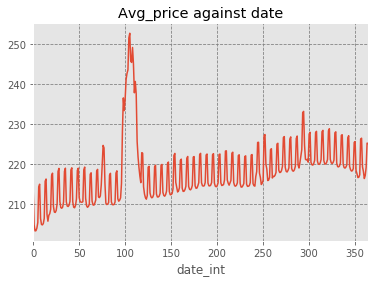

In [42]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

fig, ax = plt.subplots()
day_price.plot(kind="line",x="date_int",y="Avg_price",title="Avg_price against date",ax=ax)
ax.grid(True)
plt.grid(linestyle="--", color="grey")

plt.show()

In [43]:
s1=int(day_price.idxmax())
def getday(y,m,d,n):
    the_date = datetime.datetime(y,m,d)
    result_date = the_date + datetime.timedelta(days=n)
    d = result_date.strftime('%Y-%m-%d')
    return d
print(getday(2019,9,14,s1))
#dates aroud chirstmas have significantly high average prices

2019-12-28


In [44]:
day_price[302],day_price[301],day_price[300],day_price[299],day_price[298]

(220.4699354094067,
 227.94921536856592,
 227.5040063924711,
 220.51466051095377,
 221.2393181364171)

In [45]:
print(getday(2019,9,14,day_price[301]))
#2020-04-28

2020-04-28


**Question 2**

**Answer:**

The top 10 flourishing neighborhoods are Venice, Hollywood, Downtown, Long Beach, Santa Monica, Hollywood Hills, Westlake, Koreatown, Mid-Wilshire, and West Hollywood, which have the largest number of listings.

All of them are famous travel spots, which appeals to tourists from all over the world. The prosperous tourism industry promotes local accommodation businesses like Airbnb.

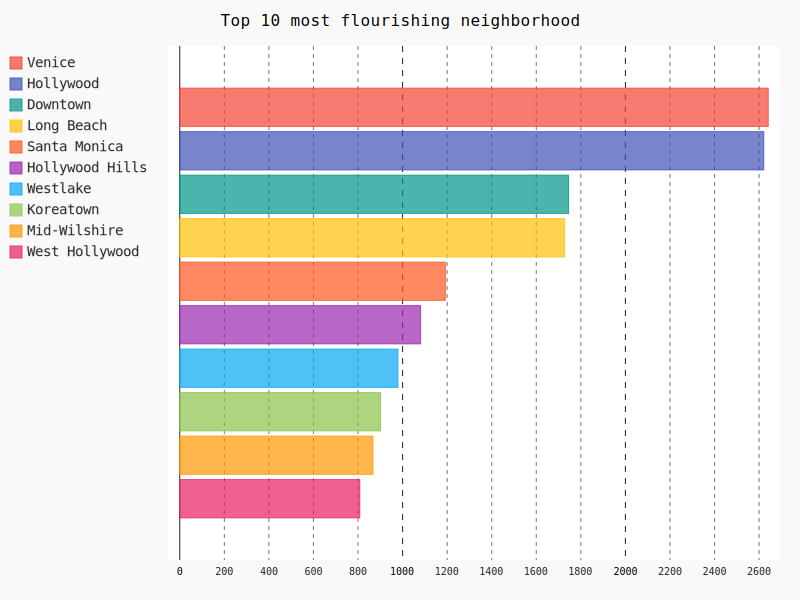

In [47]:
# Your code to answer Question 2
neighbourhood_listings=df.groupby(by="neighbourhood_cleansed")["id"].count().sort_values(ascending=False)
top10_neighbourhood=dict(neighbourhood_listings[0:10])

import pygal 
from IPython.display import SVG, display
line_chart = pygal.HorizontalBar()
line_chart.title = 'Top 10 most flourishing neighborhood'
for i in top10_neighbourhood.keys():
    line_chart.add(i, top10_neighbourhood[i])
display(SVG(line_chart.render(disable_xml_declaration=True)))

**Qesition 3**

We use the number of reviews in each year as a measurement of region popularity. And since the data in 2019 is not completely go through a year, we compare the change of number of reviews from 2014 to 2018, as well as the increasing trend of total reviews in these years. 
As shown in the bar chart, Venice always remains popular in the last several years. And Hollywood, Santa Monica, Hollywood Hills and Long beach also have high number of reviews each year. \n\n

And as shown in increasing trend line chart, the total reviews in Long Beach and downtown has better increasing speed. \n
Some of the increase in annual total reviews are because of increasing number of listings in corresponding time period, after all the reviews per listing is not change dramatically. \n
But the reviews per listing at Long Beach and downtown keep increasing in recent years. 

[Text(0.5,1,'2018')]

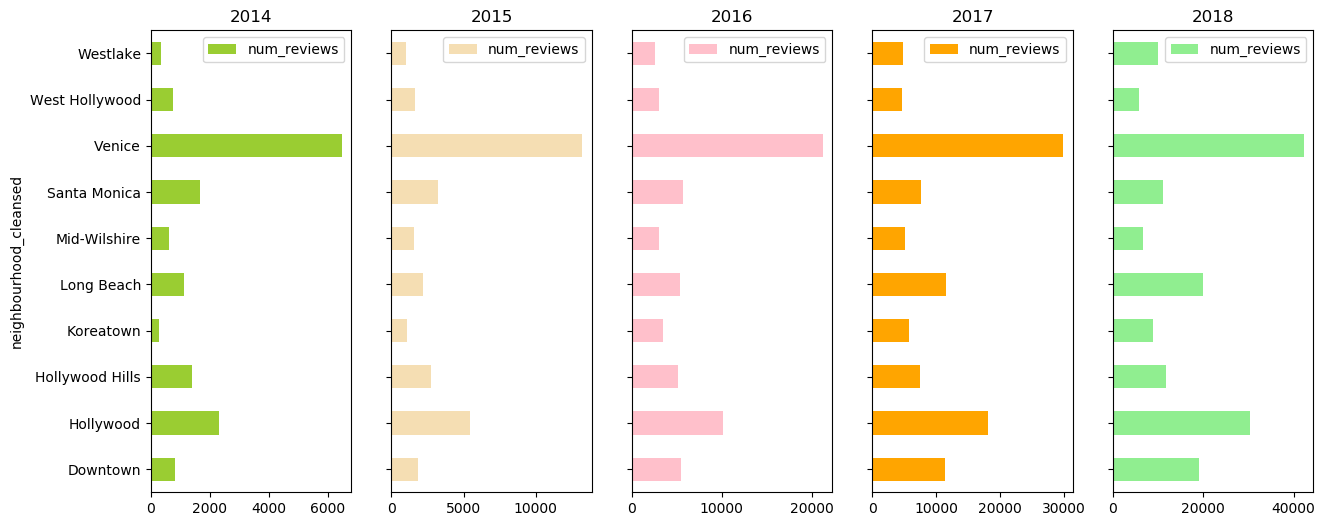

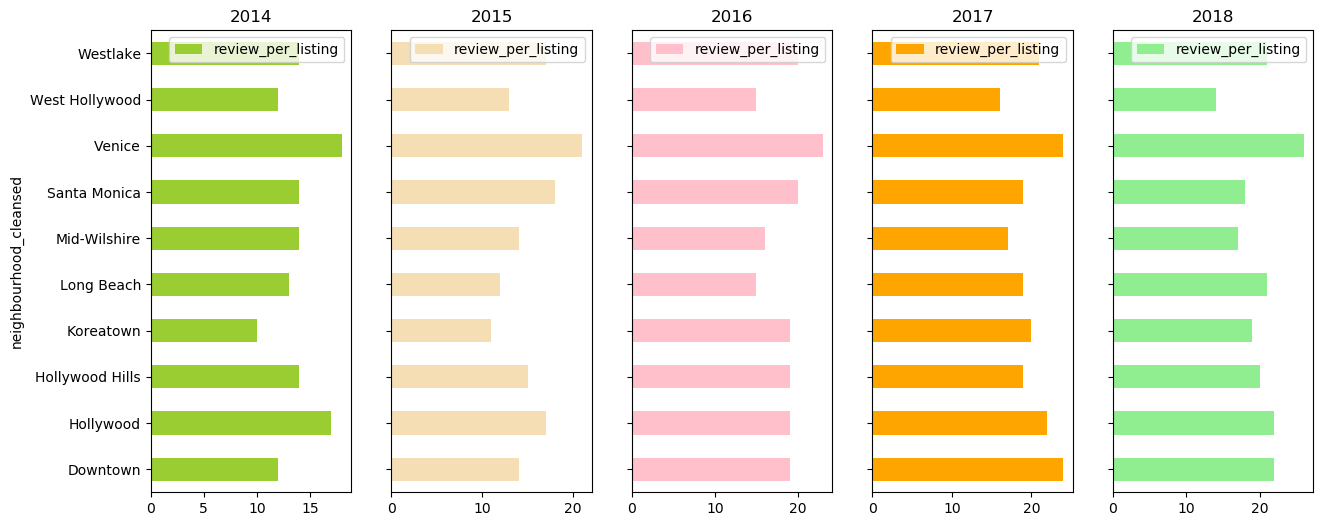

In [49]:
from pandasql import sqldf
list_neighborhoods = ['Venice','Hollywood','Downtown','Long Beach','Santa Monica','Hollywood Hills',\
                      'Westlake','Koreatown','Mid-Wilshire','West Hollywood']
dfnei = df.loc[df.neighbourhood_cleansed.isin(list_neighborhoods), \
               ['id','neighbourhood_cleansed']]
dfnei = dfnei.dropna()
reviews['year'] = reviews['date'].str.split('-').apply(lambda x:x[0])
merged1 = dfnei.merge(reviews, how = 'right', left_on = 'id', right_on = 'listing_id')
temp1 = sqldf('SELECT neighbourhood_cleansed,year, count(distinct id_y)/count(distinct listing_id) as review_per_listing,\
              count(distinct(id_y)) as num_reviews FROM merged1 GROUP BY neighbourhood_cleansed,year')
temp1 = temp1.dropna()
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
temp1 = temp1.loc[(temp1['year'] < '2019') & (temp1['year'] > '2012'), :]
fig,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(1,5, figsize = (15,6),sharey = True)
#2014
temp1.loc[temp1.year == '2014',:].plot(kind = 'barh',x = 'neighbourhood_cleansed', y = 'num_reviews', \
                                                      ax = ax0, color = 'yellowgreen')
ax0.set(title = '2014')
#2015
temp1.loc[temp1.year == '2015',:].plot(kind = 'barh', x = 'neighbourhood_cleansed', y = 'num_reviews', \
                                                      ax = ax1, color = 'wheat')
ax1.set(title = '2015')

#2016
temp1.loc[temp1.year == '2016',:].plot(kind = 'barh', x = 'neighbourhood_cleansed', y = 'num_reviews', \
                                                      ax = ax2, color = 'pink')
ax2.set(title = '2016')

#2017
temp1.loc[temp1.year == '2017',:].plot(kind = 'barh', x = 'neighbourhood_cleansed', y = 'num_reviews', \
                                                      ax = ax3, color = 'orange')
ax3.set(title = '2017')

#2018
temp1.loc[temp1.year == '2018',:].plot(kind = 'barh', x = 'neighbourhood_cleansed', y = 'num_reviews', \
                                                      ax = ax4, color = 'lightgreen')
ax4.set(title = '2018')

## the reviews per listing

fig2,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(1,5, figsize = (15,6),sharey = True)
#2014
temp1.loc[temp1.year == '2014',:].plot(kind = 'barh',x = 'neighbourhood_cleansed', y = 'review_per_listing', \
                                                      ax = ax0, color = 'yellowgreen')
ax0.set(title = '2014')
#2015
temp1.loc[temp1.year == '2015',:].plot(kind = 'barh', x = 'neighbourhood_cleansed', y = 'review_per_listing', \
                                                      ax = ax1, color = 'wheat')
ax1.set(title = '2015')

#2016
temp1.loc[temp1.year == '2016',:].plot(kind = 'barh', x = 'neighbourhood_cleansed', y = 'review_per_listing', \
                                                      ax = ax2, color = 'pink')
ax2.set(title = '2016')

#2017
temp1.loc[temp1.year == '2017',:].plot(kind = 'barh', x = 'neighbourhood_cleansed', y = 'review_per_listing', \
                                                      ax = ax3, color = 'orange')
ax3.set(title = '2017')

#2018
temp1.loc[temp1.year == '2018',:].plot(kind = 'barh', x = 'neighbourhood_cleansed', y = 'review_per_listing', \
                                                      ax = ax4, color = 'lightgreen')
ax4.set(title = '2018')

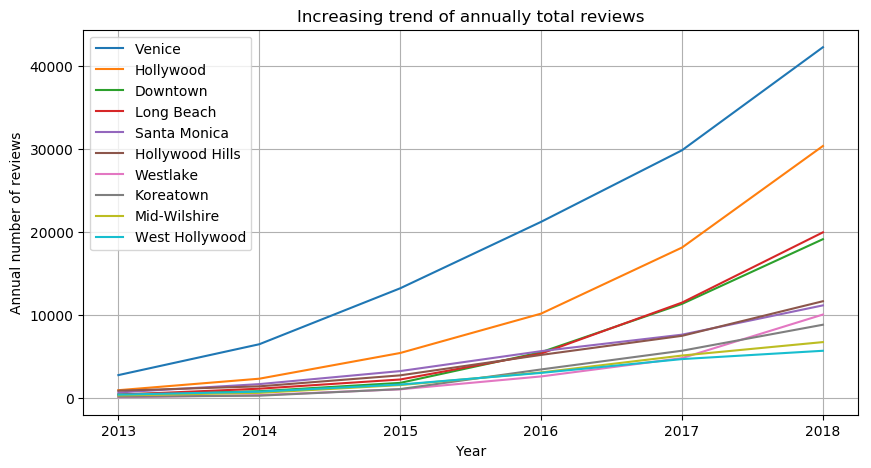

In [50]:
plt.style.use('default')
plt.figure(figsize = (10,5))
plt.title('Increasing trend of annually total reviews')
plt.xlabel('Year')
plt.ylabel('Annual number of reviews')
for place in list_neighborhoods:
    plt.plot(temp1.loc[temp1.neighbourhood_cleansed == place,:]['year'],\
             temp1.loc[temp1.neighbourhood_cleansed == place,:]['num_reviews'],'-',label = place)
plt.legend()
plt.grid(True)

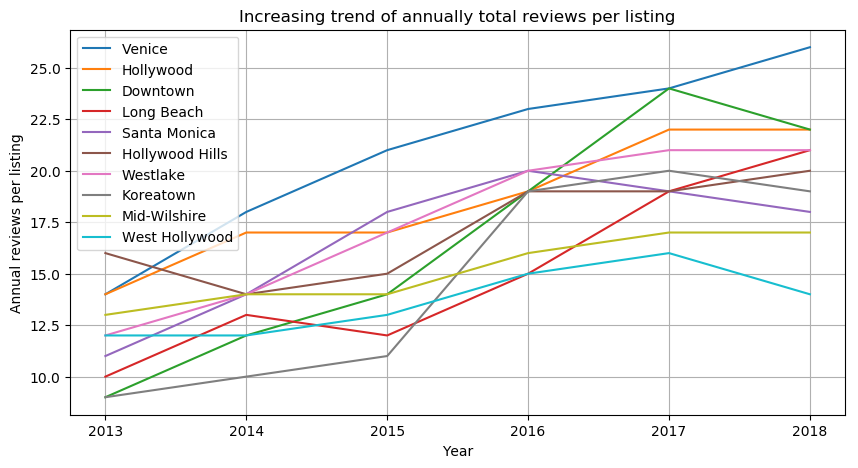

In [51]:
plt.style.use('default')
plt.figure(figsize = (10,5))
plt.title('Increasing trend of annually total reviews per listing')
plt.xlabel('Year')
plt.ylabel('Annual reviews per listing')
for place in list_neighborhoods:
    plt.plot(temp1.loc[temp1.neighbourhood_cleansed == place,:]['year'],\
             temp1.loc[temp1.neighbourhood_cleansed == place,:]['review_per_listing'],'-',label = place)
plt.legend()
plt.grid(True)

**Question 4**

In the twenty ten words of these two kind are similar, but the reviews of lower-score host contains "parking". So we check the percentage of high-score hosts and lower-score hosts providing free parking. It shows the percentage of high-score hosts providing free parking is higher. Therefore, whether hosts offer free-parking may influence their rating score.

In [52]:
df.review_scores_rating.describe()
# average of review score rating is 94.268

count    35973.000000
mean        94.268062
std          8.719265
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [53]:
super_host=df.loc[df.review_scores_rating>=94.268,["id","host_id","amenities"]]
super_zp_id=super_host.merge(reviews,how="inner",left_on="id",right_on="listing_id")

In [54]:
super_words=[]
for review in super_zp_id["comments"]:
    word_tokens = wordpunct_tokenize(str(review))
    word_tokens = [w.lower() for w in word_tokens if not w.lower() in stop_words if w.lower().isalpha()]
    for word in word_tokens:
        super_words.append(word)
count_superwords=collections.Counter(super_words).most_common(20)
count_superwords

[('great', 587586),
 ('place', 568957),
 ('stay', 488994),
 ('clean', 299845),
 ('location', 293638),
 ('would', 233405),
 ('host', 233355),
 ('nice', 223675),
 ('house', 213668),
 ('everything', 193553),
 ('comfortable', 187240),
 ('home', 185841),
 ('la', 177719),
 ('us', 177602),
 ('recommend', 175980),
 ('perfect', 164910),
 ('definitely', 160301),
 ('really', 145756),
 ('room', 143332),
 ('time', 132290)]

In [55]:
super_percentage=super_zp_id.amenities.apply(lambda x: 1 if ("free parking" in x.lower())\
                                             or ("free street parking" in x.lower())else 0)
super_percentage.mean()

0.9028362362617828

In [56]:
non_super_host=df.loc[df.review_scores_rating<=94.268,["id","host_id","amenities"]]
non_super_zp_id=non_super_host.merge(reviews,how="inner",left_on="id",right_on="listing_id")
non_super_words=[]
for review in non_super_zp_id["comments"]:
    word_tokens = wordpunct_tokenize(str(review))
    word_tokens = [w.lower() for w in word_tokens if not w.lower() in stop_words if w.lower().isalpha()]
    for word in word_tokens:
        non_super_words.append(word)
collections.Counter(non_super_words).most_common(20)

[('great', 258318),
 ('place', 251515),
 ('stay', 191211),
 ('location', 157808),
 ('clean', 123749),
 ('nice', 110995),
 ('would', 99395),
 ('host', 98210),
 ('good', 79225),
 ('room', 76305),
 ('apartment', 73940),
 ('house', 72892),
 ('la', 70330),
 ('everything', 67582),
 ('us', 63076),
 ('parking', 61900),
 ('really', 61083),
 ('comfortable', 59345),
 ('recommend', 59270),
 ('easy', 58669)]

In [57]:
non_super_percentage=non_super_zp_id.amenities.apply(lambda x: 1 if ("free parking" in x.lower())\
                                             or ("free street parking" in x.lower())else 0)
non_super_percentage.mean()

0.840878884827273

In [58]:
df3 = df.loc[:,['id','review_scores_rating']]
higher = reviews.loc[:,['listing_id','comments']].merge(df3.loc[df3.review_scores_rating >=94.268,:],\
                                                             how = 'right', left_on = 'listing_id',right_on = 'id')
lower = reviews.loc[:,['listing_id','comments']].merge(df3.loc[df3.review_scores_rating <= 94.268,:]\
                                                                ,how = 'right', left_on = 'listing_id',right_on = 'id')
higher['comments'] = higher['comments'].astype(str)
lower['comments'] = lower['comments'].astype(str)

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text_higher = ''
text_lower = ''

for index, row in higher.iterrows():
    text_higher += row['comments'].lower().replace('\n','').replace('.',' ').replace('  ',' ')
for index, row in lower.iterrows():
    text_lower += row['comments'].lower().replace('\n','').replace('.',' ').replace('  ',' ')

highercloud = WordCloud(background_color = 'white',\
                       collocations = False,max_words = 40).generate(text_higher)

lowercloud = WordCloud(background_color = 'white',\
                       collocations = False,max_words = 30).generate(text_lower)

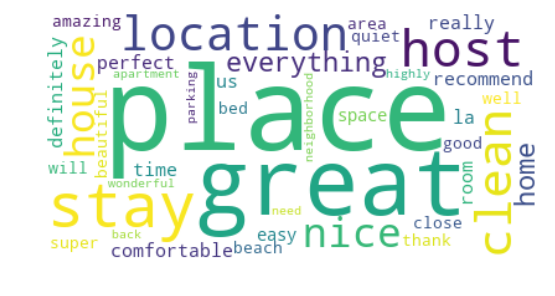

In [59]:
#Reviews of listings with its average rating higher than total average rating (94.268)'
plt.imshow(highercloud, interpolation='bilinear')
plt.axis("off")
plt.show()

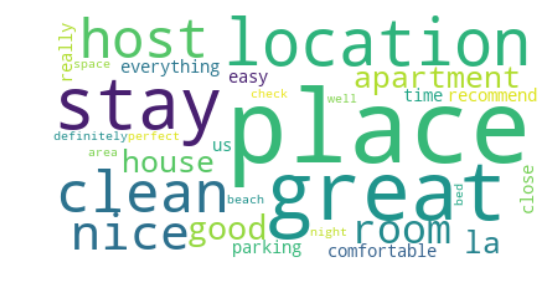

In [60]:
#Reviews of listings with its average rating lower than total average rating (94.268).
plt.imshow(lowercloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Qesition 5**

When it comes to rating difference in different property/room types, we can see the property type of different room types are significantly different. Generally the shared room has lower average rate than hotelroom, entire home/apt, and the private room. It's interesting that for 'hotel_room' type, the average rating of hotels is the lowest. Also the variance of ratins in private room is more than entire home/apt, and have some strange low scores. Generally, most private room have higher rating than share room. 

[Text(0.5,1,'Private room')]

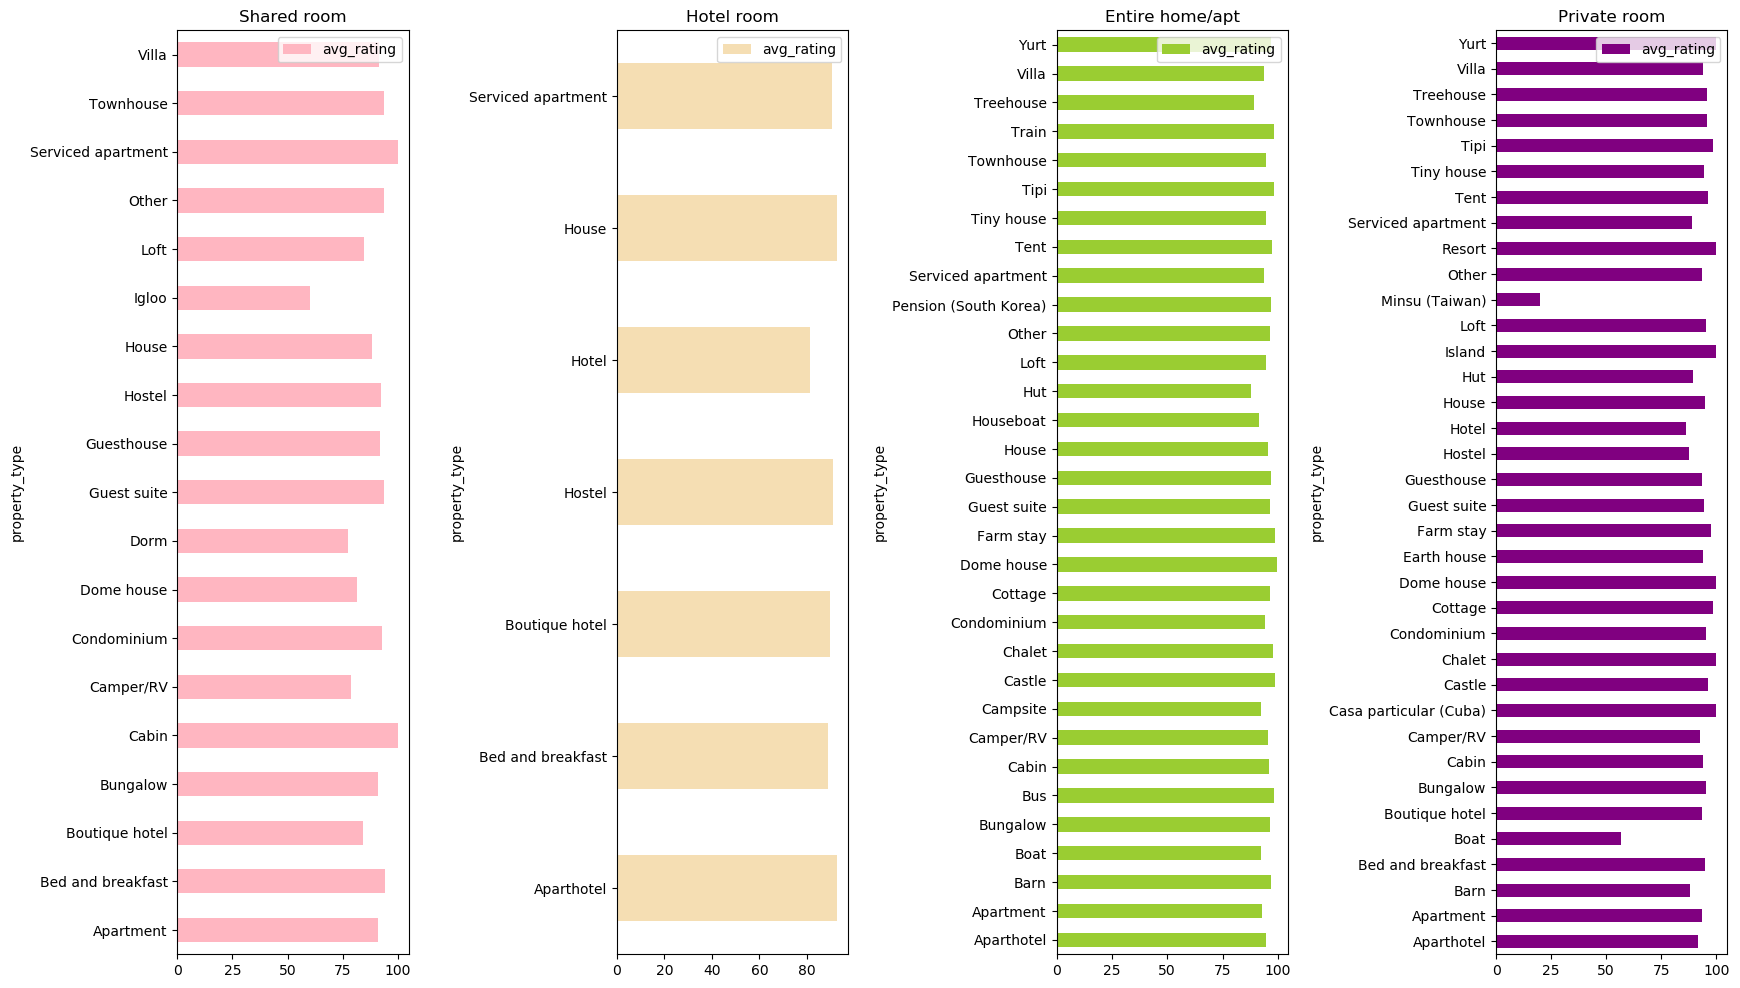

In [62]:
df2 = df.loc[:,['id','property_type','room_type','review_scores_rating']]
df2 = df2.dropna()
df22 = sqldf('SELECT property_type,room_type,AVG(review_scores_rating) as avg_rating FROM df2 GROUP BY property_type,room_type')
diff_room = list(df22.room_type.unique())
fig22,(ax00,ax11,ax22,ax33) = plt.subplots(1,4, figsize = (20,12)) 

plt.subplots_adjust(wspace=0.9)

df22.loc[df22.room_type == 'Shared room',:].plot(kind = 'barh',x = 'property_type', y = 'avg_rating', \
                                             ax = ax00, color = 'lightpink')
ax00.set(title = 'Shared room')

df22.loc[df22.room_type == 'Hotel room',:].plot(kind = 'barh',x = 'property_type', y = 'avg_rating', \
                                             ax = ax11, color = 'wheat')
ax11.set(title = 'Hotel room')

df22.loc[df22.room_type == 'Entire home/apt',:].plot(kind = 'barh',x = 'property_type', y = 'avg_rating', \
                                             ax = ax22, color = 'yellowgreen')
ax22.set(title = 'Entire home/apt')


df22.loc[df22.room_type == 'Private room',:].plot(kind = 'barh',x = 'property_type', y = 'avg_rating', \
                                             ax = ax33, color = 'purple')
ax33.set(title = 'Private room')

## Executive Summary
**(You need to use this cell to write your executive summary)**

First, we look at how the average daily listing price change with the date. Overall there is a fluctuation in the average daily listings price, and the price is increasing moderately. As we can see, dates around Christmas have significantly high average prices, which is quite reasonable. There is also a predicted high price on April 28th, 2020. Hosts may get more revenue on specific holidays.

Then we are interested in how location influences Airbnb's business. After analyzing the data, we find that the top 10 flourishing neighborhoods are Venice, Hollywood, Downtown, Long Beach, Santa Monica, Hollywood Hills, Westlake, Koreatown, Mid-Wilshire, and West Hollywood, which have the largest number of listings. All of them are famous travel spots, which appeals to tourists from all over the world. The prosperous tourism industry promotes local accommodation businesses like Airbnb.

To take a closer look at the most popular locations, In question 3, we use the number of reviews in each year as a measurement of region popularity. The reviews per listing at Long Beach and downtown keep increasing in recent years and the number of total reviews has better-increasing speed. Therefore, we believe Long beach and Downtown are the most business potential community. 

In Question 4, we try to find the difference between reviews of high-score hosts and lower-score hosts. In the top twenty words of these two kind are similar, but the reviews of lower-score host contains "parking". So we check the percentage of high-score hosts and lower-score hosts providing free parking. It shows the percentage of high-score hosts providing free parking is higher. Therefore, whether hosts offer free-parking may influence their rating score.

When it comes to rating difference in different property/room types, we can see the property type of different room types are significantly different. The variance of ratings in the private room is more than the entire home/apt, and have some strange low scores. Airbnb should focus more on the control of hosts providing private-room listings.
